In [47]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [48]:
tf.__version__

'2.12.0'

In [49]:
dataset = pd.read_excel('Folds5x2_pp.xlsx')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [51]:
ann = tf.keras.models.Sequential()

In [52]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [53]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [54]:
ann.add(tf.keras.layers.Dense(units=1))

In [55]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [56]:
ann.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
240/240 [==============================] - 4s 3ms/step - loss: 1307.5244
Epoch 2/100
240/240 [==============================] - 1s 3ms/step - loss: 179.4043
Epoch 3/100
240/240 [==============================] - 1s 3ms/step - loss: 159.4569
Epoch 4/100
240/240 [==============================] - 1s 3ms/step - loss: 137.2245
Epoch 5/100
240/240 [==============================] - 1s 4ms/step - loss: 114.2779
Epoch 6/100
240/240 [==============================] - 1s 4ms/step - loss: 93.2823
Epoch 7/100
240/240 [==============================] - 1s 3ms/step - loss: 76.0373
Epoch 8/100
240/240 [==============================] - 1s 3ms/step - loss: 61.9867
Epoch 9/100
240/240 [==============================] - 1s 3ms/step - loss: 52.5376
Epoch 10/100
240/240 [==============================] - 1s 3ms/step - loss: 45.9382
Epoch 11/100
240/240 [==============================] - 1s 3ms/step - loss: 40.2210
Epoch 12/100
240/240 [==============================] - 1s 3ms/step - loss: 36.

In [57]:
y_pred = ann.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

60/60 [==============================] - 0s 3ms/step
[[429.09 431.23]
 [460.04 460.01]
 [463.52 461.14]
 ...
 [470.76 473.26]
 [437.61 438.  ]
 [456.79 463.28]]


In [58]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test.reshape(len(y_test),1), y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 29.707884933882323
R2 Score: 0.8984303573416723


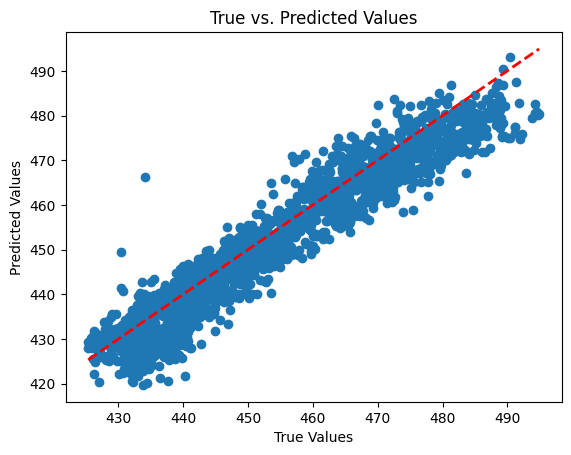

In [59]:
plt.scatter(y_test.reshape(len(y_test),1), y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.show()

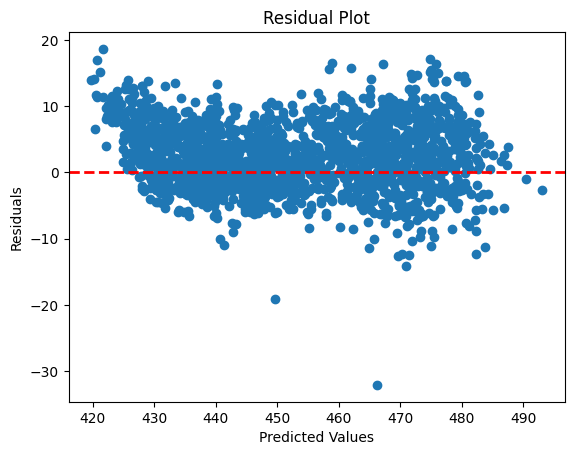

In [60]:
residuals = y_test.reshape(len(y_test),1) - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


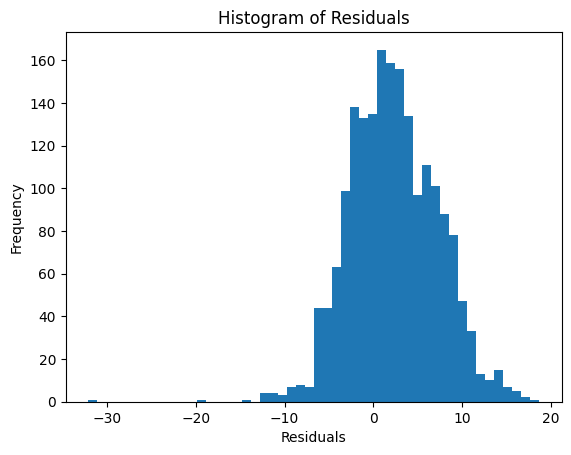

In [61]:
plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()